<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_06_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

1. Implementar el metodo de la bisección para determinar las raices de una función.
2. Implementar el metodo de la newton para determinar las raices de una función.

Prueba tu resultado para:


  
 2. $a e^{x}-2= b\cos(e^x-2)$

In [39]:
from sympy.abc import x
from sympy import Symbol
from sympy.utilities.lambdify import implemented_function
from sympy import lambdify
from sympy import Derivative, Function, symbols, Subs

import matplotlib.pyplot as plt

import numpy as np

In [104]:
def sign(num):
    return True if num > 0 else False

# function to crate a list of initial guesses for the other functions to use.
def ZerosGuesses(f, inferior_range = -10, superior_range = 10, accuracy = 0.1):
    range_ab = np.arange(inferior_range, superior_range, accuracy)
    ZeroGuess = []
    x_im1 = range_ab[0]
    for x_i in range_ab:
        if sign(f(x_i)) != sign(f(x_im1)):
            ZeroGuess.append(x_im1)
        x_im1 = x_i
    return ZeroGuess

def Biseccion(f, p1 = None, p2 = None, e = 1e-108, inferior_range = -10, superior_range = 10, accuracy = 0.1):

    # block of code to return a list of zeros on the inerval (inferior_range, superior_range)
    if p1==None or p2==None:
        zeros = ZerosGuesses(f, inferior_range, superior_range, accuracy)

        try:
            zeros[0]
        except:
            raise ValueError(f'f may have no zeros on the interval ({inferior_range}, {superior_range}), try changing the interval, using an smaler value for accuracy or verify if f has any zeros.')

        for i, zero_i in enumerate(zeros):
            zeros[i] = Biseccion(f, zero_i, zero_i + accuracy, e)
        if len(zeros) == 1:
            return zeros[0]
        else:
            return zeros

    # errors of the function
    if sign(f(p1)) == sign (f(p2)):
        raise ValueError(f'f({p1}) and f({p2}) cannot have the same sign')

    # Bisection method implementation
    xi = (p1+p2)/2
    counter = 0
    while (abs(f(xi)) > e) and (counter != 100):
        counter += 1
        xi = (p1+p2)/2
        if sign(f(p1)) == sign(f(xi)):
            p1 = xi
        else:
            p2 = xi
    return xi

def Dx(f):
    from sympy.abc import x
    fp = lambdify(x, Derivative(f(x), x, evaluate = True))
    return fp

def Newton(f, fp = None, x0 = None, e = 1e-108, inferior_range = -10, superior_range = 10, accuracy = 0.1):

    # block of code to return a list of zeros on the inerval (inferior_range, superior_range)
    if x0 == None:
        zeros = ZerosGuesses(f, inferior_range, superior_range, accuracy)

        if len(zeros) == 0:
            raise ValueError(f'f may have no zeros on the interval ({inferior_range}, {superior_range}), try changing the interval, using an smaler value for accuracy or verify if f has any zeros.')

        for i, zero_i in enumerate(zeros):
            zeros[i] = Newton(f, fp, zero_i, e)
        if len(zeros) == 1:
            return zeros[0]
        else:
            return zeros

    # finding the derivative of f if not given (works only for lambda functions defined in terms of basic algebraic operations in python)
    if fp == None:
        fp = Dx(f)

    # Newton's method implementation
    xi = x0
    counter = 0
    while (abs(f(xi)) > e) and (counter != 100):
        counter += 1
        try:
            xi = xi - f(xi)/fp(xi)
        except:
            xi = xi - f(xi)/(0.1)
    return xi

a = 3
b = 2
0.057980029952558555
0.05798002995255852


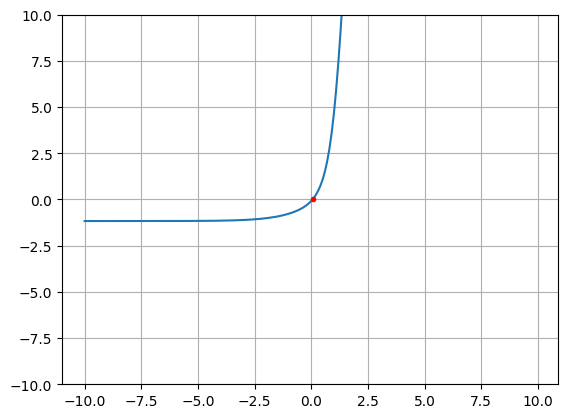

In [122]:
print(f'a = {(a := np.random.randint(1,11))}')
print(f'b = {(b := np.random.randint(1,11))}')

f = lambda x : a*np.exp(x)-2 - (b*np.cos(np.exp(x)-2))
fp = lambda x : a*np.exp(x) + b*np.sin(np.exp(x)-2) * np.exp(x)

r=10

x = np.arange(-r,r,0.1)
y = f(x)

plt.plot(x,y)
plt.ylim(-r,r)
plt.grid(True)

print(Newton(f, fp))
print(zeros := Biseccion(f))


plt.plot(zeros, f(zeros), 'r.')
plt.show()